<a href="https://colab.research.google.com/github/udupa-varun/pyimagesearch_uni/blob/main/deep_learning/105/keras_lenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/keras-lenet/keras-lenet.zip
!unzip -qq keras-lenet.zip
%cd keras-lenet

--2023-02-23 09:04:30--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/keras-lenet/keras-lenet.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.243.17, 3.5.81.129, 52.92.240.146, ...
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.243.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3228 (3.2K) [application/zip]
Saving to: ‘keras-lenet.zip’

keras-lenet.zip     100%[===================>]   3.15K  --.-KB/s    in 0s      

2023-02-23 09:04:31 (162 MB/s) - ‘keras-lenet.zip’ saved [3228/3228]

/content/keras-lenet


In [3]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, Dense, Flatten, MaxPool2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

import matplotlib.pyplot as plt
import numpy as np

In [4]:
class LeNet:
    @staticmethod
    def build(width, height, depth, classes):
        # init model
        model = Sequential()
        input_shape = (height, width, depth)

        if K.image_data_format == "channels_first":
            input_shape = (depth, height, width)

        # first set of CONV => RELU => POOL layers
        model.add(
            Conv2D(
                filters=20,
                kernel_size=(5, 5),
                padding="same",
                input_shape=input_shape
            )
        )
        model.add(Activation("relu"))
        model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

        # second set of CONV => RELU => POOL layers
        model.add(
            Conv2D(
                filters=50,
                kernel_size=(5, 5),
                padding="same",
            )
        )
        model.add(Activation("relu"))
        model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))

        # first and only set of FC => RELU layers
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))

        # softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))

        # return constructed network architecture
        return model

### LeNet on MNIST

In [5]:
# grab MNIST data
print("[INFO] accessing MNIST...")
((train_data, train_labels), (test_data, test_labels)) = mnist.load_data()

[INFO] accessing MNIST...
11490434/11490434 [==============================] - 1s 0us/step


In [6]:
# if channels first, reshape to num_samples x depth x rows x columns
if K.image_data_format() == "channels_first":
    train_data = train_data.reshape((train_data.shape[0], 1, 28, 28))
    test_data = test_data.reshape((test_data.shape[0], 1, 28, 28))
# channels last -> reshape to num_samples x rows x columns x depth
else:
    train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
    test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))


In [7]:
# scale data to [0, 1]
train_data = train_data.astype("float") / 255.0
test_data = test_data.astype("float") / 255.0

# convert labels from integers to vectors
le = LabelBinarizer()
train_labels = le.fit_transform(train_labels)
test_labels = le.fit_transform(test_labels)

In [8]:
# init optimizer and model
print("[INFO] compiling model...")
opt = SGD(learning_rate=0.01)
model = LeNet.build(width=28, height=28, depth=1, classes=10)
model.compile(
    loss="categorical_crossentropy",
    optimizer=opt,
    metrics=["accuracy"]
)

# train network
print("[INFO] training network...")
H = model.fit(
    train_data,
    train_labels,
    validation_data=(test_data, test_labels),
    batch_size=128,
    epochs=20,
    verbose=1
)

[INFO] compiling model...
[INFO] training network...
Epoch 1/20
469/469 [==============================] - 129s 273ms/step - loss: 1.0166 - accuracy: 0.7254 - val_loss: 0.3764 - val_accuracy: 0.8771
Epoch 2/20
469/469 [==============================] - 120s 255ms/step - loss: 0.2710 - accuracy: 0.9184 - val_loss: 0.2031 - val_accuracy: 0.9425
Epoch 3/20
469/469 [==============================] - 91s 194ms/step - loss: 0.1960 - accuracy: 0.9421 - val_loss: 0.1662 - val_accuracy: 0.9487
Epoch 4/20
469/469 [==============================] - 92s 197ms/step - loss: 0.1541 - accuracy: 0.9541 - val_loss: 0.1426 - val_accuracy: 0.9562
Epoch 5/20
469/469 [==============================] - 91s 195ms/step - loss: 0.1266 - accuracy: 0.9623 - val_loss: 0.1078 - val_accuracy: 0.9694
Epoch 6/20
469/469 [==============================] - 93s 199ms/step - loss: 0.1079 - accuracy: 0.9679 - val_loss: 0.1049 - val_accuracy: 0.9658
Epoch 7/20
469/469 [==============================] - 91s 194ms/step - loss

[INFO] evaluating network...
79/79 [==============================] - 7s 84ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.95      0.99      0.97      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



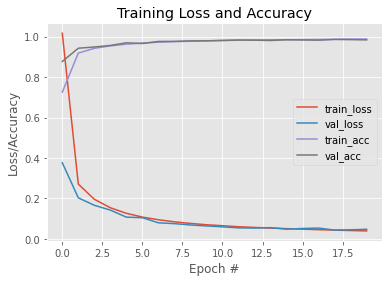

In [9]:
# evaluate network
print("[INFO] evaluating network...")
predictions = model.predict(test_data, batch_size=128)
print(
    classification_report(
        test_labels.argmax(axis=1),
        predictions.argmax(axis=1),
        target_names=[str(x) for x in le.classes_]
    )
)

# plot training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()
